# Goal: plot all vs. diff csv for data visulization and analysis

Notes:
* this is using the csv file generated from updated script

Sketch of problem:

* We have info from two sets of csv data: 
* 1) "All" refers to the reads from metagenome that mapped to the certain genome
* 2) "diff" refers to the above mapped reads that did not get assembled

* In this combined CVS file, we gathered following info:
* - coverage (averaged fromm each base)
* - CIGAR value, and calculated aligned percentage
* - mapping quality
* - R1, R2, and present/absent in the "diff" file

Questions:
* Can we identify the potential reasons for the mapped reads that did not end up with assembly with scatter plot


data from `/home/zyzhao/AL_onemetagenome/subtract/*.combined.csv on farm.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker

# for html export
import plotly.io as pio
pio.renderers.default ='notebook'

# for PDF export
!pip install Pyppeteer
!pyppeteer-install

from pprint import pprint

chromium is already installed.


## loading data

In [7]:
metagenome="ERR257715"
genome="GCA_905479735"
filename = f"/Users/ZYZhao/projects/AL/AL_onemetagenome/subtract/analysis/combined2/{metagenome}.x.{genome}.1.combined.csv"

In [8]:
#load data, for first 100 dataset, do: df = pd.read_csv(filename, nrows=100)
df = pd.read_csv(filename)
c = len(df)
print("Total ~", c, "x2 entry of mapped reads")
df

Total ~ 233416 x2 entry of mapped reads


,all_name1,all_1_cov,all_1_cigar,all_1_mapq,all_1_readlen,all_1_align_f,all_1_is_pair,all_1_is_primary,all_1_ref_contig,all_1_ref_start,...,diff_2_cov,diff_2_cigar,diff_2_mapq,diff_2_readlen,diff_2_align_f,diff_2_is_pair,diff_2_is_primary,diff_2_ref_contig,diff_2_ref_start,diff_2_ref_end
0,ERR257715.7592907/1,32.91,101M,60.0,101.0,1.0,1.0,1.0,CAJQNS010000014.1,16060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ERR257715.22680091/1,9.86,101M,60.0,101.0,1.0,1.0,1.0,CAJQNS010000227.1,23401.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ERR257715.30007955/1,10.38,101M,60.0,101.0,1.0,1.0,1.0,CAJQNS010000197.1,3742.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ERR257715.32829685/1,9.17,101M,60.0,101.0,1.0,1.0,1.0,CAJQNS010000158.1,3201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ERR257715.1635354/1,9.96,101M,60.0,101.0,1.0,1.0,1.0,CAJQNS010000014.1,19291.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233411,ERR257715.2839925/1,4.20,101M,60.0,101.0,1.0,1.0,1.0,CAJQNS010000249.1,15073.0,...,4.53,101M,60.0,101.0,1.0,0.0,1.0,CAJQNS010000249.1,15274.0,15374.0
233412,ERR257715.1307226/1,5.88,101M,60.0,101.0,1.0,1.0,1.0,CAJQNS010000207.1,9177.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233413,ERR257715.4319260/1,19.13,101M,60.0,101.0,1.0,1.0,1.0,CAJQNS010000217.1,4489.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233414,ERR257715.25526634/1,36.36,101M,60.0,101.0,1.0,1.0,1.0,CAJQNS010000060.1,4423.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Categorize "all_1_cov" values into three categories
bins = [float('-inf'), 20, 50, float('inf')]
labels = ['<20', '20-50', '>50']
df['all_1_cov_category'] = pd.cut(df['all_1_cov'], bins=bins, labels=labels, right=False)


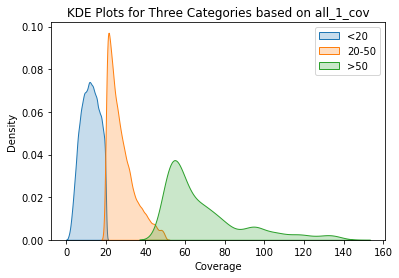

In [10]:
# Create KDE plots for each category
sns.kdeplot(data=df[df['all_1_cov_category'] == '<20'], x='all_1_cov', label='<20', shade=True)
sns.kdeplot(data=df[(df['all_1_cov_category'] == '20-50')], x='all_1_cov', label='20-50', shade=True)
sns.kdeplot(data=df[df['all_1_cov_category'] == '>50'], x='all_1_cov', label='>50', shade=True)

# Set plot labels and title
plt.xlabel('Coverage')
plt.ylabel('Density')
plt.title('KDE Plots for Three Categories based on all_1_cov')

# Show legend
plt.legend()

# Show the plot
plt.show()

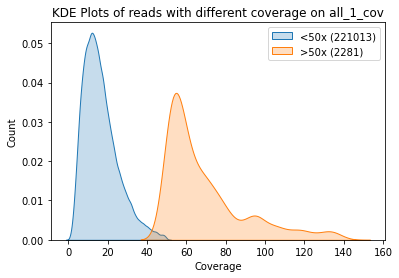

In [11]:
# Categorize "all_1_cov" values into three categories
bins = [float('-inf'), 50, float('inf')]
labels = ['<50', '>50']
df['all_1_cov_category'] = pd.cut(df['all_1_cov'], bins=bins, labels=labels, right=False)

# Create KDE plots for each category
kde_plot_1 = sns.kdeplot(data=df[df['all_1_cov_category'] == '<50'], x='all_1_cov', label='<50x', shade=True, common_norm=False)
kde_plot_2 = sns.kdeplot(data=df[df['all_1_cov_category'] == '>50'], x='all_1_cov', label='>50x', shade=True, common_norm=False)

# Get counts for legend
count_1 = len(df[df['all_1_cov_category'] == '<50'])
count_2 = len(df[df['all_1_cov_category'] == '>50'])

# Set plot labels and title
plt.xlabel('Coverage')
plt.ylabel('Count')
plt.title('KDE Plots of reads with different coverage on all_1_cov')

# Show legend with counts
plt.legend([f'<50x ({count_1})', f'>50x ({count_2})'])

# Show the plot
plt.show()

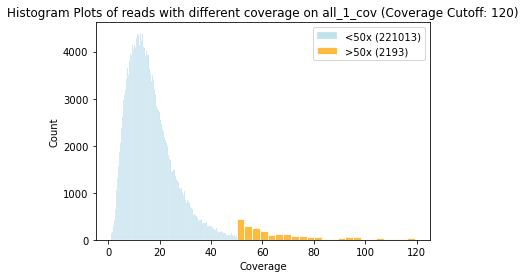

In [25]:
# Filter data based on coverage cutoff
data_below_120 = df[(df['all_1_cov_category'] == '<50') & (df['all_1_cov'] <= 120)]
data_above_120 = df[(df['all_1_cov_category'] == '>50') & (df['all_1_cov'] <= 120)]

# Create histogram plots with specified colors, smaller bins, and white borders
hist_plot_1 = sns.histplot(data=data_below_120, x='all_1_cov', label='<50x', color='lightblue', edgecolor='white',)
hist_plot_2 = sns.histplot(data=data_above_120, x='all_1_cov', label='>50x', color='orange', edgecolor='white',)

# Get counts for legend
count_1 = len(data_below_120)
count_2 = len(data_above_120)

# Set plot labels and title
plt.xlabel('Coverage')
plt.ylabel('Count')
plt.title('Histogram Plots of reads with different coverage on all_1_cov (Coverage Cutoff: 120)')

# Show legend with counts
plt.legend([f'<50x ({count_1})', f'>50x ({count_2})'])

# Show the plot
plt.show()

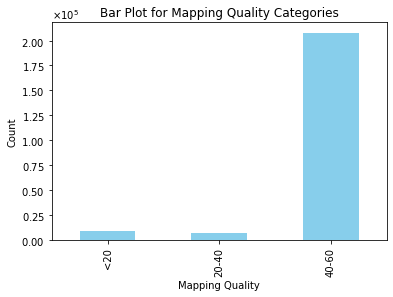

In [12]:
# Categorize "all_1_mapq" values into three categories
mapq_bins = [float('-inf'), 20, 40, float('inf')]
mapq_labels = ['<20', '20-40', '40-60']
df['all_1_mapq_category'] = pd.cut(df['all_1_mapq'], bins=mapq_bins, labels=mapq_labels, right=False)

# Count the occurrences in each category
category_counts = df['all_1_mapq_category'].value_counts()

# Create a bar plot
ax = category_counts.sort_index().plot(kind='bar', color='skyblue')

# Set plot labels and title
plt.xlabel('Mapping Quality')
plt.ylabel('Count')

# Format y-axis ticks in scientific notation
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True, useOffset=False))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.title('Bar Plot for Mapping Quality Categories')

# Show the plot
plt.show()

In [26]:
# making a pie chart for R1 and R2
data = {
    'Category': ['Total Diff Reads R1', 'Reads >50x Cov R1', 'MapQ > 40 R1', 'CIGAR AF > 0.5 R1',
                 'Total Diff Reads R2', 'Reads >50x Cov R2', 'MapQ > 40 R2', 'CIGAR AF > 0.5 R2'],
    'Count': [14128, 1043, 849, 391, 3913, 1010, 411, 401]
}

df_r = pd.DataFrame(data)

df_r1 = df[df_r['Category'].str.contains('R1')]
df_r2 = df[df_r['Category'].str.contains('R2')]

# Create pie chart for R1 reads
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(df_r1['Count'], labels=df_r1['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Read Categories - R1')

# Create pie chart for R2 reads
plt.subplot(1, 2, 2)
plt.pie(df_r2['Count'], labels=df_r2['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Read Categories - R2')

plt.tight_layout()
plt.show()

/var/folders/2v/pjf15hqn3fs9d8p873k54x1r0000gq/T/ipykernel_13412/3095472779.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [27]:
#curious how many and what reads have both R1 and R2 present in diff file
df_diff_12 = df[(df['diff_1_present'] == "diff_1_PRESENT") & (df['diff_2_present'] == "diff_2_PRESENT")]
c_diff_12 = len(df_diff_12)

print("diff_1 & diff_2 have", c_diff_12, "reads have both R1 & R2 reads in diff file ")
df_diff_12

diff_1 & diff_2 have 4757 reads have both R1 & R2 reads in diff file 


,all_name1,all_1_cov,all_1_cigar,all_1_mapq,all_1_readlen,all_1_align_f,all_1_is_pair,all_1_is_primary,all_1_ref_contig,all_1_ref_start,...,diff_2_cigar,diff_2_mapq,diff_2_readlen,diff_2_align_f,diff_2_is_pair,diff_2_is_primary,diff_2_ref_contig,diff_2_ref_start,diff_2_ref_end,all_1_cov_category
6,ERR257715.34404307/1,1.61,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000150.1,25396.0,...,101M,60.0,101.0,1.00000,0.0,1.0,CAJQNS010000150.1,25644.0,25744.0,<50
28,ERR257715.11118931/1,4.32,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000014.1,47266.0,...,101M,60.0,101.0,1.00000,0.0,1.0,CAJQNS010000014.1,47129.0,47229.0,<50
36,ERR257715.28450620/1,7.28,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000024.1,13275.0,...,101M,60.0,101.0,1.00000,0.0,1.0,CAJQNS010000024.1,13094.0,13194.0,<50
44,ERR257715.28051700/1,5.78,101M,60.0,101.0,1.000000,0.0,1.0,CAJQNS010000024.1,13494.0,...,101M,60.0,101.0,1.00000,0.0,1.0,CAJQNS010000024.1,13255.0,13355.0,<50
45,ERR257715.20901403/1,6.14,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000021.1,3625.0,...,101M,60.0,101.0,1.00000,0.0,1.0,CAJQNS010000021.1,3446.0,3546.0,<50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233048,ERR257715.10007197/1,50.47,6S76M19S,47.0,101.0,0.752475,1.0,1.0,CAJQNS010000080.1,15396.0,...,91M10S,19.0,101.0,0.90099,0.0,1.0,CAJQNS010000080.1,15640.0,15730.0,>50
233120,ERR257715.8390289/1,12.22,98M3S,59.0,101.0,0.970297,1.0,1.0,CAJQNS010000214.1,6518.0,...,101M,60.0,101.0,1.00000,0.0,1.0,CAJQNS010000214.1,6342.0,6442.0,<50
233142,ERR257715.19947340/1,25.35,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000055.1,2250.0,...,101M,60.0,101.0,1.00000,0.0,1.0,CAJQNS010000055.1,2484.0,2584.0,<50
233224,ERR257715.20324222/1,2.46,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000043.1,1235.0,...,101M,60.0,101.0,1.00000,0.0,1.0,CAJQNS010000043.1,1442.0,1542.0,<50


In [28]:
#pull out diff_R1 reads, find reads that have cov >50x, mapq >40, & >50% bases aligned in CIGAR
df_diff1 = df[(df['diff_1_present'] == "diff_1_PRESENT")]
df_diff1_cov50 = df_diff1[(df_diff1['all_1_cov'] >= 50)]
df_diff1_cov50_mq40 = df_diff1_cov50[(df_diff1_cov50['all_1_mapq'] >= 40)]
df_diff1_cov50_mq40_af50 = df_diff1_cov50_mq40[(df_diff1_cov50_mq40['all_1_align_f'] >= 0.5)]

c_diff1 = len(df_diff1)
c_diff1_cov50 = len(df_diff1_cov50)
c_diff1_cov50_mq40 = len(df_diff1_cov50_mq40)
c_diff1_cov50_mq40_af50 = len(df_diff1_cov50_mq40_af50)

print(c_diff1, "out of", c, "mapped R1 reads did not end up in assembly")
print("Among them,", c_diff1_cov50,"Reads have coverage > 50x")
print("  -", c_diff1_cov50_mq40, "reads have mq > 40", )
print("    -", c_diff1_cov50_mq40_af50, "reads have CIGAR_af >50", )
df_diff1_cov50_mq40_af50

14128 out of 233416 mapped R1 reads did not end up in assembly
Among them, 1043 Reads have coverage > 50x
  - 395 reads have mq > 40
    - 391 reads have CIGAR_af >50


,all_name1,all_1_cov,all_1_cigar,all_1_mapq,all_1_readlen,all_1_align_f,all_1_is_pair,all_1_is_primary,all_1_ref_contig,all_1_ref_start,...,diff_2_cigar,diff_2_mapq,diff_2_readlen,diff_2_align_f,diff_2_is_pair,diff_2_is_primary,diff_2_ref_contig,diff_2_ref_start,diff_2_ref_end,all_1_cov_category
47,ERR257715.9561641/1,50.28,96M5S,60.0,101.0,0.950495,1.0,1.0,CAJQNS010000125.1,503.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50
680,ERR257715.17417212/1,114.82,88M1D9M4S,60.0,101.0,0.960396,0.0,1.0,CAJQNS010000024.1,20386.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50
2956,ERR257715.19805523/1,54.25,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000124.1,18366.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50
3349,ERR257715.6143083/1,54.90,101M,45.0,101.0,1.000000,1.0,1.0,CAJQNS010000027.1,6540.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50
6694,ERR257715.32609438/1,118.12,59M1D9M33S,43.0,101.0,0.673267,0.0,1.0,CAJQNS010000024.1,20415.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231699,ERR257715.5831106/1,55.55,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000125.1,434.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50
232214,ERR257715.18810198/1,56.42,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000125.1,442.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50
232300,ERR257715.11410811/1,84.42,101M,60.0,101.0,1.000000,0.0,1.0,CAJQNS010000109.1,9982.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50
232980,ERR257715.19923338/1,72.90,101M,53.0,101.0,1.000000,1.0,1.0,CAJQNS010000027.1,6221.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50


/Users/ZYZhao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/ZYZhao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning:

`shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.



<AxesSubplot:xlabel='all_1_align_f', ylabel='all_1_mapq'>

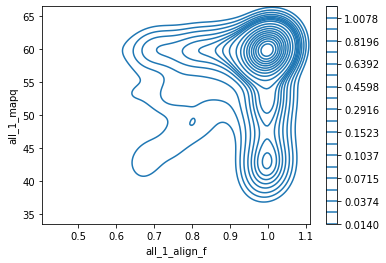

In [30]:
# seaborn plot for these 391 reads
sns.kdeplot(df_diff1_cov50_mq40_af50.all_1_align_f, df_diff1.all_1_mapq,
            n_levels=20, shade_lowest=False, cbar=True,)

In [ ]:
# use Geneious to see what are those cov50_mq40_af50 reads
# found they are clustered in certain region of few contigs

In [31]:
df_diff1_cov50_mq40_af50_isPair = df_diff1_cov50_mq40_af50[(df_diff1_cov50_mq40_af50['all_1_is_pair'] == 1.0)]

c_diff1_cov50_mq40_af50_isPair = len(df_diff1_cov50_mq40_af50_isPair)
print("Number of paired reads:", c_diff1_cov50_mq40_af50_isPair)
df_diff1_cov50_mq40_af50_isPair

Number of paired reads: 264


,all_name1,all_1_cov,all_1_cigar,all_1_mapq,all_1_readlen,all_1_align_f,all_1_is_pair,all_1_is_primary,all_1_ref_contig,all_1_ref_start,...,diff_2_cigar,diff_2_mapq,diff_2_readlen,diff_2_align_f,diff_2_is_pair,diff_2_is_primary,diff_2_ref_contig,diff_2_ref_start,diff_2_ref_end,all_1_cov_category
47,ERR257715.9561641/1,50.28,96M5S,60.0,101.0,0.950495,1.0,1.0,CAJQNS010000125.1,503.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50
2956,ERR257715.19805523/1,54.25,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000124.1,18366.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50
3349,ERR257715.6143083/1,54.90,101M,45.0,101.0,1.000000,1.0,1.0,CAJQNS010000027.1,6540.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50
7681,ERR257715.8964313/1,88.40,101M,52.0,101.0,1.000000,1.0,1.0,CAJQNS010000089.1,4594.0,...,101M,43.0,101.0,1.00000,0.0,1.0,CAJQNS010000089.1,4649.0,4749.0,>50
7814,ERR257715.33147603/1,83.17,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000109.1,9927.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230373,ERR257715.29278095/1,81.47,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000027.1,5374.0,...,101M,60.0,101.0,1.00000,0.0,1.0,CAJQNS010000027.1,5498.0,5598.0,>50
231699,ERR257715.5831106/1,55.55,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000125.1,434.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50
232214,ERR257715.18810198/1,56.42,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000125.1,442.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50
232980,ERR257715.19923338/1,72.90,101M,53.0,101.0,1.000000,1.0,1.0,CAJQNS010000027.1,6221.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>50


In [32]:
#export df_csv to local folder
df_diff1_cov50_mq40_af50_isPair.to_csv('diff1_cov50_mq40_af50_isPair.csv', index=False)

In [33]:
# how many from 391 >50x_cov, >40mq, >0.5% af reads also have R2 in diff (not used for assembly)
df_diff1_cov50_mq40_af50_R2diff = df_diff1_cov50_mq40_af50[(df_diff1_cov50_mq40_af50['diff_2_present'] == "diff_2_PRESENT")]

c_diff1_cov50_mq40_af50_R2diff= len(df_diff1_cov50_mq40_af50_R2diff)
print("R2 also in diff file:", c_diff1_cov50_mq40_af50_R2diff)
df_diff1_cov50_mq40_af50_R2diff

R2 also in diff file: 125


,all_name1,all_1_cov,all_1_cigar,all_1_mapq,all_1_readlen,all_1_align_f,all_1_is_pair,all_1_is_primary,all_1_ref_contig,all_1_ref_start,...,diff_2_cigar,diff_2_mapq,diff_2_readlen,diff_2_align_f,diff_2_is_pair,diff_2_is_primary,diff_2_ref_contig,diff_2_ref_start,diff_2_ref_end,all_1_cov_category
7681,ERR257715.8964313/1,88.40,101M,52.0,101.0,1.000000,1.0,1.0,CAJQNS010000089.1,4594.0,...,101M,43.0,101.0,1.000000,0.0,1.0,CAJQNS010000089.1,4649.0,4749.0,>50
9739,ERR257715.15938492/1,52.23,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000125.1,2383.0,...,101M,16.0,101.0,1.000000,0.0,1.0,CAJQNS010000125.1,2548.0,2648.0,>50
12112,ERR257715.34381894/1,56.28,101M,51.0,101.0,1.000000,1.0,1.0,CAJQNS010000125.1,469.0,...,101M,2.0,101.0,1.000000,0.0,1.0,CAJQNS010000125.1,514.0,614.0,>50
12665,ERR257715.16366554/1,79.25,101M,58.0,101.0,1.000000,1.0,1.0,CAJQNS010000027.1,5956.0,...,101M,58.0,101.0,1.000000,0.0,1.0,CAJQNS010000027.1,6147.0,6247.0,>50
13843,ERR257715.28278554/1,62.02,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000080.1,10334.0,...,17S84M,15.0,101.0,0.831683,0.0,1.0,CAJQNS010000080.1,10562.0,10645.0,>50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225217,ERR257715.24538555/1,76.08,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000027.1,6255.0,...,101M,13.0,101.0,1.000000,0.0,1.0,CAJQNS010000027.1,6021.0,6121.0,>50
227377,ERR257715.33193533/1,58.73,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000089.1,4397.0,...,101M,60.0,101.0,1.000000,0.0,1.0,CAJQNS010000089.1,4612.0,4712.0,>50
228135,ERR257715.10608087/1,51.49,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000027.1,5465.0,...,101M,49.0,101.0,1.000000,0.0,1.0,CAJQNS010000027.1,5327.0,5427.0,>50
230373,ERR257715.29278095/1,81.47,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000027.1,5374.0,...,101M,60.0,101.0,1.000000,0.0,1.0,CAJQNS010000027.1,5498.0,5598.0,>50


In [34]:
#Same analysis for diff_R2 reads, find reads that have cov >50x, mapq >40, & >50% bases aligned in CIGAR
df_diff2 = df[(df['diff_2_present'] == "diff_2_PRESENT")]
df_diff2_cov50 = df_diff2[(df_diff2['all_2_cov'] >= 50)]
df_diff2_cov50_mq40 = df_diff2_cov50[(df_diff2_cov50['all_2_mapq'] >= 40)]
df_diff2_cov50_mq40_af50 = df_diff2_cov50_mq40[(df_diff2_cov50_mq40['all_2_align_f'] >= 0.5)]

c_diff2 = len(df_diff2)
c_diff2_cov50 = len(df_diff2_cov50)
c_diff2_cov50_mq40 = len(df_diff2_cov50_mq40)
c_diff2_cov50_mq40_af50 = len(df_diff2_cov50_mq40_af50)

print(c_diff2, "out of", c, "mapped R2 reads did not end up in assembly")
print("Among them,", c_diff2_cov50,"Reads have coverage > 50x")
print("  -", c_diff2_cov50_mq40, "reads have mq > 40", )
print("    -", c_diff2_cov50_mq40_af50, "reads have CIGAR_af >50", )
df_diff2_cov50_mq40_af50

13913 out of 233416 mapped R2 reads did not end up in assembly
Among them, 1010 Reads have coverage > 50x
  - 411 reads have mq > 40
    - 401 reads have CIGAR_af >50


,all_name1,all_1_cov,all_1_cigar,all_1_mapq,all_1_readlen,all_1_align_f,all_1_is_pair,all_1_is_primary,all_1_ref_contig,all_1_ref_start,...,diff_2_cigar,diff_2_mapq,diff_2_readlen,diff_2_align_f,diff_2_is_pair,diff_2_is_primary,diff_2_ref_contig,diff_2_ref_start,diff_2_ref_end,all_1_cov_category
62,ERR257715.7154617/1,38.72,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000125.1,2928.0,...,101M,60.0,101.0,1.000000,0.0,1.0,CAJQNS010000125.1,2807.0,2907.0,<50
232,ERR257715.12427725/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2S74M1D9M16S,60.0,101.0,0.821782,0.0,1.0,CAJQNS010000024.1,20400.0,20483.0,NaN
301,ERR257715.6559830/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101M,60.0,101.0,1.000000,0.0,1.0,CAJQNS010000080.1,10382.0,10482.0,NaN
587,ERR257715.19100026/1,51.21,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000125.1,707.0,...,101M,60.0,101.0,1.000000,0.0,1.0,CAJQNS010000125.1,461.0,561.0,>50
1034,ERR257715.18067154/1,17.61,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000235.1,4658.0,...,2S88M11S,0.0,101.0,0.871287,0.0,1.0,CAJQNS010000233.1,2441.0,2528.0,<50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231619,ERR257715.13445903/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4S97M,60.0,101.0,0.960396,0.0,1.0,CAJQNS010000235.1,4856.0,4952.0,NaN
231675,ERR257715.20620537/1,24.18,101M,60.0,101.0,1.000000,1.0,1.0,CAJQNS010000027.1,5088.0,...,101M,60.0,101.0,1.000000,0.0,1.0,CAJQNS010000027.1,5357.0,5457.0,<50
231691,ERR257715.21075431/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101M,60.0,101.0,1.000000,0.0,1.0,CAJQNS010000109.1,10047.0,10147.0,NaN
232833,ERR257715.28205891/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52M49S,60.0,101.0,0.514851,0.0,1.0,CAJQNS010000202.1,26.0,77.0,NaN


In [35]:
df_diff2_cov50_mq40_af50_isPair = df_diff2_cov50_mq40_af50[(df_diff2_cov50_mq40_af50['all_2_is_pair'] == 1.0)]

c_diff2_cov50_mq40_af50_isPair = len(df_diff2_cov50_mq40_af50_isPair)
print("Number of paired reads:", c_diff2_cov50_mq40_af50_isPair)
#df_diff2_cov50_mq40_af50_isPair

Number of paired reads: 279


In [36]:
df_diff2_cov50_mq40_af50_R1diff = df_diff2_cov50_mq40_af50[(df_diff2_cov50_mq40_af50['diff_1_present'] == "diff_1_PRESENT")]

c_diff2_cov50_mq40_af50_R1diff= len(df_diff2_cov50_mq40_af50_R1diff)
print("R1 also in diff file:", c_diff2_cov50_mq40_af50_R1diff)
df_diff2_cov50_mq40_af50_R1diff

R1 also in diff file: 137


,all_name1,all_1_cov,all_1_cigar,all_1_mapq,all_1_readlen,all_1_align_f,all_1_is_pair,all_1_is_primary,all_1_ref_contig,all_1_ref_start,...,diff_2_cigar,diff_2_mapq,diff_2_readlen,diff_2_align_f,diff_2_is_pair,diff_2_is_primary,diff_2_ref_contig,diff_2_ref_start,diff_2_ref_end,all_1_cov_category
62,ERR257715.7154617/1,38.72,101M,60.0,101.0,1.0,1.0,1.0,CAJQNS010000125.1,2928.0,...,101M,60.0,101.0,1.0,0.0,1.0,CAJQNS010000125.1,2807.0,2907.0,<50
1462,ERR257715.6920116/1,28.25,101M,60.0,101.0,1.0,1.0,1.0,CAJQNS010000125.1,203.0,...,101M,60.0,101.0,1.0,0.0,1.0,CAJQNS010000125.1,468.0,568.0,<50
5225,ERR257715.23239363/1,47.60,101M,60.0,101.0,1.0,1.0,1.0,CAJQNS010000080.1,10210.0,...,101M,13.0,101.0,1.0,0.0,1.0,CAJQNS010000080.1,10304.0,10404.0,<50
7034,ERR257715.24981151/1,47.70,101M,46.0,101.0,1.0,1.0,1.0,CAJQNS010000125.1,2989.0,...,101M,13.0,101.0,1.0,0.0,1.0,CAJQNS010000125.1,2748.0,2848.0,<50
7103,ERR257715.10309567/1,36.04,101M,60.0,101.0,1.0,1.0,1.0,CAJQNS010000089.1,4318.0,...,101M,60.0,101.0,1.0,0.0,1.0,CAJQNS010000089.1,4562.0,4662.0,<50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225217,ERR257715.24538555/1,76.08,101M,60.0,101.0,1.0,1.0,1.0,CAJQNS010000027.1,6255.0,...,101M,13.0,101.0,1.0,0.0,1.0,CAJQNS010000027.1,6021.0,6121.0,>50
227377,ERR257715.33193533/1,58.73,101M,60.0,101.0,1.0,1.0,1.0,CAJQNS010000089.1,4397.0,...,101M,60.0,101.0,1.0,0.0,1.0,CAJQNS010000089.1,4612.0,4712.0,>50
227709,ERR257715.31974090/1,34.53,101M,52.0,101.0,1.0,1.0,1.0,CAJQNS010000125.1,2903.0,...,101M,32.0,101.0,1.0,0.0,1.0,CAJQNS010000125.1,2742.0,2842.0,<50
228135,ERR257715.10608087/1,51.49,101M,60.0,101.0,1.0,1.0,1.0,CAJQNS010000027.1,5465.0,...,101M,49.0,101.0,1.0,0.0,1.0,CAJQNS010000027.1,5327.0,5427.0,>50


In [ ]:
#below are previous data analysis, may ignore for now

In [ ]:
sns.kdeplot(df_diff.all_1_align_f, df_diff.all_1_mapq,
            n_levels=20, shade_lowest=False, cbar=True,)

In [ ]:
df_diff2 = df_diff[df_diff['all_1_mapq'] > 40]
df_diff2

In [ ]:
sns.kdeplot(df_diff2.all_1_align_f, df_diff2.all_1_mapq,
            n_levels=20, shade_lowest=False, cbar=True,)
            #hue=df_filtered.diff_1_present, palette={'diff_1_PRESENT': 'Red', 'diff_1_ABSENT': 'Blue'})

In [ ]:
df_filtered['color'] = df_filtered['diff_1_present'].map({'diff_1_PRESENT': 'Red', 'diff_1_ABSENT': 'blue'})
legend_labels = df_filtered['diff_1_present'].unique()

df_filtered.plot.scatter(x='all_1_align_f', y='all_1_mapq', c=df_filtered['color'], alpha=0.5,
                title='ERR257715.x.GCA_905479735 > 50 All Mapped Reads1',
                xlabel='CIGAR aligned fraction', ylabel='mapping quality')
plt.legend(labels=legend_labels)

plt.show()

In [ ]:
# Categorize "all_1_mapq" values into three categories
mapq_bins = [float('-inf'), 20, 40, 60, float('inf')]
mapq_labels = ['<20', '20-39', '40-60', '>60']
df['all_1_mapq_category'] = pd.cut(df['all_1_mapq'], bins=mapq_bins, labels=mapq_labels, right=False)

# Create KDE plots for each category
sns.kdeplot(data=df[df['all_1_mapq_category'] == '<20'], x='all_1_mapq', label='<20', shade=True)
sns.kdeplot(data=df[df['all_1_mapq_category'] == '20-39'], x='all_1_mapq', label='20-39', shade=True)
sns.kdeplot(data=df[df['all_1_mapq_category'] == '40-60'], x='all_1_mapq', label='40-60', shade=True)

# Set plot labels and title
plt.xlabel('Mapping Quality')
plt.ylabel('Density')
plt.title('KDE Plots for Three Categories based on all_1_mapq')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
bins = [float('-inf'), 20, 50, float('inf')]
labels = ['<20', '20-50', '>50']
df['all_1_cov_category'] = pd.cut(df['all_1_cov'], bins=bins, labels=labels, right=False)

sns.kdeplot(data=df[df['all_1_cov_category'] == '<20'], x='all_1_align_f', y='all_1_mapq',
                hue='diff_1_present', palette={'diff_1_PRESENT': 'Red', 'diff_1_ABSENT': 'Blue'}, alpha=0.5, cbar=True)
plt.xlabel('CIGAR aligned fraction')
plt.ylabel('Mapping quality')
plt.title('Scatter Plot for all_1_cov < 20')
plt.legend()
plt.show()

In [ ]:
bins = [float('-inf'), 20, 50, float('inf')]
labels = ['<20', '20-50', '>50']
df['all_1_cov_category'] = pd.cut(df['all_1_cov'], bins=bins, labels=labels, right=False)

# Plot for '<20'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df[df['all_1_cov_category'] == '<20'], x='all_1_align_f', y='all_1_mapq',
                hue='diff_1_present', palette={'diff_1_PRESENT': 'Red', 'diff_1_ABSENT': 'Blue'}, alpha=0.5)
plt.xlabel('CIGAR aligned fraction')
plt.ylabel('Mapping quality')
plt.title('Scatter Plot for all_1_cov < 20')
plt.legend()
plt.show()

# Plot for '20-50'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df[df['all_1_cov_category'] == '20-50'], x='all_1_align_f', y='all_1_mapq',
                hue='diff_1_present', palette={'diff_1_PRESENT': 'Red', 'diff_1_ABSENT': 'Blue'}, alpha=0.5)
plt.xlabel('CIGAR aligned fraction')
plt.ylabel('Mapping quality')
plt.title('Scatter Plot for 20 <= all_1_cov <= 50')
plt.legend()
plt.show()

# Plot for '>50'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df[df['all_1_cov_category'] == '>50'], x='all_1_align_f', y='all_1_mapq',
                hue='diff_1_present', palette={'diff_1_PRESENT': 'Red', 'diff_1_ABSENT': 'Blue'}, alpha=0.5)
plt.xlabel('CIGAR aligned fraction')
plt.ylabel('Mapping quality')
plt.title('Scatter Plot for all_1_cov > 50')
plt.legend()
plt.show()

In [ ]:
bins = [float('-inf'), 20, 50, float('inf')]
labels = ['<20', '20-50', '>50']
df['all_1_cov_category'] = pd.cut(df['all_1_cov'], bins=bins, labels=labels, right=False)

# Plot for '<20'
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['all_1_cov_category'] == '<20'], x='all_1_align_f', y='all_1_mapq',
            hue='diff_1_present', palette={'diff_1_PRESENT': 'Red', 'diff_1_ABSENT': 'Blue'},)
plt.xlabel('CIGAR aligned fraction')
plt.ylabel('Mapping quality')
plt.title('KDE Plot for all_1_cov < 20')
plt.legend()
plt.show()

# Plot for '20-50'
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['all_1_cov_category'] == '20-50'], x='all_1_align_f', y='all_1_mapq',
            hue='diff_1_present', palette={'diff_1_PRESENT': 'Red', 'diff_1_ABSENT': 'Blue'}, fill=True)
plt.xlabel('CIGAR aligned fraction')
plt.ylabel('Mapping quality')
plt.title('KDE Plot for 20 <= all_1_cov <= 50')
plt.legend()
plt.show()

# Plot for '>50'
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['all_1_cov_category'] == '>50'], x='all_1_align_f', y='all_1_mapq',
            hue='diff_1_present', palette={'diff_1_PRESENT': 'Red', 'diff_1_ABSENT': 'Blue'}, fill=True)
plt.xlabel('CIGAR aligned fraction')
plt.ylabel('Mapping quality')
plt.title('KDE Plot for all_1_cov > 50')
plt.legend()
plt.show()

In [ ]:
df['color'] = df['diff_1_present'].map({'diff_1_PRESENT': 'Red', 'diff_1_ABSENT': 'blue'})
legend_labels = df['diff_1_present'].unique()

# Scatter plot
df.plot.scatter(x='all_1_align_f', y='all_1_mapq', c=df['color'], alpha=0.5,
                title='ERR257715.x.GCA_905479735 All Mapped Reads1', xlabel='CIGAR aligned fraction', ylabel='mapping quality')
plt.legend(labels=legend_labels)

# Create a KDE plot for coverage density
sns.kdeplot(data=df, x='all_1_align_f', y='all_1_mapq', fill=True, cmap='Blues', levels=5, alpha=0.5)

# Show the plot
plt.show()

In [ ]:
# Create a KDE plot
sns.kdeplot(df['all_1_cov'], label='all_1_cov')
sns.kdeplot(df['all_2_cov'], label='all_2_cov', linestyle='dashed')

plt.xlabel('Coverage')
plt.ylabel('Density')
plt.title('Combined KDE Plots for Coverage')
plt.legend()
plt.show()

In [ ]:
sns.kdeplot(df['all_1_align_f'], label='all_1_af')
sns.kdeplot(df['all_2_align_f'], label='all_2_af', linestyle='dashed')

plt.xlabel('align fraction')
plt.ylabel('Density')
plt.title('Combined KDE Plots for CIGAR align fraction')

plt.legend()
plt.show()

In [ ]:
df['color'] = df['diff_1_present'].map({'diff_1_PRESENT': 'Red', 'diff_1_ABSENT': 'blue'})
legend_labels = df['diff_1_present'].unique()

df.plot.scatter(x='all_1_align_f', y='all_1_mapq', c=df['color'], alpha=0.5,
                title='ERR257715.x.GCA_905479735 All Mapped Reads1', xlabel='CIGAR aligned fraction', ylabel='mapping quality')
plt.legend(labels=legend_labels)

plt.show()


In [ ]:
df['color'] = df['diff_1_present'].map({'diff_1_PRESENT': 'Red', 'diff_1_ABSENT': 'blue'})
legend_labels = df['diff_1_present'].unique()

df.plot.scatter(x='all_1_mapq', y='all_1_align_f', c=df['color'], alpha=0.5,
                title='ERR257715.x.GCA_905479735 All Mapped Reads1', xlabel='mapping quality', ylabel='CIGAR aligned fraction')
plt.legend(labels=legend_labels)

plt.show()


In [ ]:
df['color'] = df['diff_2_present'].map({'diff_2_PRESENT': 'Orange', 'diff_2_ABSENT': 'black'})
legend_labels = df['diff_2_present'].unique()

df.plot.scatter(x='all_2_align_f', y='all_2_mapq', c=df['color'], alpha=0.5,
                title='ERR257715.x.GCA_905479735 All Mapped Reads2', xlabel='CIGAR aligned fraction', ylabel='mapping quality')
plt.legend(labels=legend_labels)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame

# Drop unnecessary columns for modeling
df_model = df.drop(['all_1_cov_category', 'diff_1_present'], axis=1)

# Encode categorical columns if needed
label_encoder = LabelEncoder()
df_model['diff_2_present_encoded'] = label_encoder.fit_transform(df_model['diff_2_present'])

# Define features (X) and target variable (y)
X = df_model.drop(['diff_2_present_encoded'], axis=1)
y = df['diff_1_present']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)